In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp

In this project, I am trying to find out if there are any consulates that have a higher chance of getting Schengen visa, and if there is any connection between them.


# **Data Cleaning**

In [2]:
df_17 = pd.read_csv('2017-data-for-consulates.csv')
df_18 = pd.read_csv('2018-data-for-consulates.csv')
df = pd.merge(left = df_17, right=df_18, left_index=True, right_index=True, suffixes=('', '_18'))
df_raw = pd.read_csv('2018-data-for-consulates.csv')
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas,Schengen State_18,Country where consulate is located_18,Consulate_18,Airport transit visas (ATVs) applied for _18,ATVs issued (including multiple)_18,Multiple ATVs issued_18,ATVs not issued _18,Not issued rate for ATVs_18,Uniform visas applied for_18,Total uniform visas issued (including MEV) _18,Multiple entry uniform visas (MEVs) issued_18,Share of MEVs on total number of uniform visas issued_18,Total LTVs issued_18,Uniform visas not issued_18,Not issued rate for uniform visas_18,Total ATVs and uniform visas applied for_18,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs) _18",Total ATVs and uniform visas not issued_18,Not issued rate for ATVs and uniform visas _18
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,57,47,25,53.2%,6,4,7.0%,57,53,4,7.0%,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,"2,315","1,658","1,367",82.4%,2,655,28.3%,"2,315","1,660",655,28.3%,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,17,17,17,100.0%,NaN,NaN,NaN,17,17,NaN,NaN,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,"2,305","2,190",666,30.4%,NaN,115,5.0%,"2,305","2,190",115,5.0%,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,NaN,NaN,NaN,NaN,NaN,"1,922","1,737","1,731",99.7%,2,183,9.5%,"1,922","1,739",183,9.5%,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


We are not interested in Airport Transit Visas at all, therefore, we should remove these columns from the datasets.

In [3]:
df.columns = [col.strip() for col in df.columns]
print(df.columns)

Index(['Schengen State', 'Country where consulate is located', 'Consulate',
       'Airport transit visas (ATVs) applied for',
       'ATVs issued (including multiple)', 'Multiple ATVs issued',
       'ATVs not issued', 'Not issued rate for ATVs',
       'Uniform visas applied for',
       'Total  uniform visas issued (including MEV)',
       'Multiple entry uniform visas (MEVs) issued',
       'Share of MEVs on total number of uniform visas issued',
       'Total LTVs issued', 'Uniform visas not issued',
       'Not issued rate for uniform visas',
       'Total ATVs and uniform visas applied for',
       'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs)',
       'Total ATVs and uniform visas not issued',
       'Not issued rate for ATVs and uniform visas', 'Schengen State_18',
       'Country where consulate is located_18', 'Consulate_18',
       'Airport transit visas (ATVs) applied for _18',
       'ATVs issued (including multiple)_18', 'Multiple ATVs is

In [0]:
df.drop([
        'Airport transit visas (ATVs) applied for',
        'ATVs issued (including multiple)',
        'Multiple ATVs issued', 'ATVs not issued',
        'Not issued rate for ATVs',
        'Total ATVs and uniform visas applied for',
        'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs)',
        'Total ATVs and uniform visas not issued',
        'Not issued rate for ATVs and uniform visas',
        'Schengen State_18',
       'Country where consulate is located_18', 'Consulate_18',
       'Airport transit visas (ATVs) applied for _18',
       'ATVs issued (including multiple)_18','Multiple ATVs issued_18',
       'ATVs not issued _18', 'Not issued rate for ATVs_18','Total ATVs and uniform visas applied for_18',
       'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) _18',
       'Total ATVs and uniform visas not issued_18',
       'Not issued rate for ATVs and uniform visas _18'
        ], axis=1, inplace=True)

In [5]:
df.head()

,Schengen State,Country where consulate is located,Consulate,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Uniform visas applied for_18,Total uniform visas issued (including MEV) _18,Multiple entry uniform visas (MEVs) issued_18,Share of MEVs on total number of uniform visas issued_18,Total LTVs issued_18,Uniform visas not issued_18,Not issued rate for uniform visas_18
0,Austria,ALBANIA,TIRANA,57,47,25,53.2%,6,4,7.0%,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,"2,315","1,658","1,367",82.4%,2,655,28.3%,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,17,17,17,100.0%,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,"2,305","2,190",666,30.4%,NaN,115,5.0%,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,"1,922","1,737","1,731",99.7%,2,183,9.5%,1976,1895,1769,93.4%,2,79,4.0%


In [6]:
df.rename(columns={
    'Schengen State': 'sch_state',
    'Consulate': 'consulate_city',
    'Country where consulate is located': 'consulate_country',
    'Uniform visas applied for': 'applications',
    'Total  uniform visas issued (including MEV)': 'uniform_visas_issued',
    'Multiple entry uniform visas (MEVs) issued': 'mevs_issued',
    'Share of MEVs on total number of uniform visas issued': 'mevs_share',
    'Total LTVs issued': 'ltvs_issued',
    'Uniform visas not issued': 'rejected',
    'Not issued rate for uniform visas': 'rejection_rate',
    'Uniform visas applied for_18' : 'applications_18',
    'Total  uniform visas issued (including MEV) \n_18' : 'uniform_visas_issued_18',
    'Multiple entry uniform visas (MEVs) issued_18' : 'mevs_issued_18',
    'Share of MEVs on total number of uniform visas issued_18' : 'mevs_share_18',
    'Total LTVs issued_18' : 'ltvs_issued_18', 
    'Uniform visas not issued_18' : 'rejected_18',
    'Not issued rate for uniform visas_18' : 'rejection_rate_18'
    }, inplace=True)
df = df.dropna(how='all').reset_index(drop=True)
df.head()


,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,ltvs_issued,rejected,rejection_rate,applications_18,uniform_visas_issued_18,mevs_issued_18,mevs_share_18,ltvs_issued_18,rejected_18,rejection_rate_18
0,Austria,ALBANIA,TIRANA,57,47,25,53.2%,6,4,7.0%,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,"2,315","1,658","1,367",82.4%,2,655,28.3%,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,17,17,17,100.0%,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,"2,305","2,190",666,30.4%,NaN,115,5.0%,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,"1,922","1,737","1,731",99.7%,2,183,9.5%,1976,1895,1769,93.4%,2,79,4.0%


In [7]:
df.isnull().sum()

sch_state                   13
consulate_country           13
consulate_city              10
applications                11
uniform_visas_issued        46
mevs_issued                148
mevs_share                 149
ltvs_issued                853
rejected                   388
rejection_rate             389
applications_18              4
uniform_visas_issued_18     44
mevs_issued_18             137
mevs_share_18              139
ltvs_issued_18             832
rejected_18                349
rejection_rate_18          350
dtype: int64

In [0]:
df = df.dropna(axis=0, subset=['sch_state']).reset_index(drop=True)
df.fillna(0, inplace = True)

Now we need to double check if calculations are correct. Also, we need to remove LTV visas because they are given under specific circumstances and they are not in subject of our in

In [9]:
df.isnull().sum()

sch_state                  0
consulate_country          0
consulate_city             0
applications               0
uniform_visas_issued       0
mevs_issued                0
mevs_share                 0
ltvs_issued                0
rejected                   0
rejection_rate             0
applications_18            0
uniform_visas_issued_18    0
mevs_issued_18             0
mevs_share_18              0
ltvs_issued_18             0
rejected_18                0
rejection_rate_18          0
dtype: int64

In [0]:
change_list = ['uniform_visas_issued',
               'uniform_visas_issued_18',
               'ltvs_issued',
               'ltvs_issued_18',
               'rejected',
               'rejected_18',
               'applications',
               'applications_18',
               'mevs_issued',
               'mevs_issued_18']
for col in change_list:
  df[col] = df[col].str.replace(",","")

In [0]:
df.isnull().sum()
df.fillna(0, inplace = True)

In [0]:
df['applications'] = df['applications'].astype(int) + df['applications_18'].astype(int)
df['uniform_visas_issued'] = df['uniform_visas_issued'].astype(int) + df['uniform_visas_issued_18'].astype(int)
df['mevs_issued'] = df['mevs_issued'].astype(int) + df['mevs_issued_18'].astype(int)
df['ltvs_issued'] = df['ltvs_issued'].astype(int) + df['ltvs_issued_18'].astype(int)
df['rejected'] = df['rejected'].astype(int) + df['rejected_18'].astype(int)

In [13]:
df.drop(['applications_18', 
         'uniform_visas_issued_18',
         'mevs_issued_18',
         'mevs_share_18',
         'ltvs_issued_18',
         'rejected_18',
         'rejection_rate_18'], axis=1, inplace=True)
df.head()

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,ltvs_issued,rejected,rejection_rate
0,Austria,ALBANIA,TIRANA,119,79,35,53.2%,27,13,7.0%
1,Austria,ALGERIA,ALGIERS,4796,3316,2828,82.4%,3,1477,28.3%
2,Austria,ARGENTINA,BUENOS AIRES,33,33,33,100.0%,0,0,0
3,Austria,AUSTRALIA,CANBERRA,5081,4843,1655,30.4%,1,237,5.0%
4,Austria,AZERBAIJAN,BAKU,3898,3632,3500,99.7%,4,262,9.5%


Now we need to recalculate shares and rejection rates.

In [0]:
df.fillna(0, inplace = True)

In [0]:
df['decisions'] = df.uniform_visas_issued.astype(int) + df.ltvs_issued.astype(int) + df.rejected.astype(int)

In [16]:
print('More applications than decisions entries =', len(df[df.decisions.astype(int) < df.applications.astype(int)]))
print('More decisions than applications entries =', len(df[df.decisions.astype(int) > df.applications.astype(int)]))

More applications than decisions entries = 826
More decisions than applications entries = 59


First case can be explained by some appplications still being processed.

The second case can be explained by some applications taking a long time to consider, or to be considered in the "in-between" 2017 and 2018 years.

I will use decisions column so that there wouldn't be any confusion. Before that, I will subtract the value of LTV visas as well as recalculate the rejection rate.

In [17]:
df['decisions'] = df['decisions'].astype(int) - df['ltvs_issued'].astype(int)
df['applications'] = df['applications'].astype(int) - df['ltvs_issued'].astype(int)
df.drop('ltvs_issued', axis=1, inplace=True)
df['rejection_rate'] = df['rejected'].astype(int) / df['decisions'].astype(int)
df['mevs_share'] = df['mevs_issued'].astype(int) / df['decisions'].astype(int)
df.head()

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,rejected,rejection_rate,decisions
0,Austria,ALBANIA,TIRANA,92,79,35,0.380435,13,0.141304,92
1,Austria,ALGERIA,ALGIERS,4793,3316,2828,0.590027,1477,0.308158,4793
2,Austria,ARGENTINA,BUENOS AIRES,33,33,33,1.000000,0,0.000000,33
3,Austria,AUSTRALIA,CANBERRA,5080,4843,1655,0.325787,237,0.046654,5080
4,Austria,AZERBAIJAN,BAKU,3894,3632,3500,0.898819,262,0.067283,3894


# Starting analysis on a certain country

In [18]:
country = 'KAZAKHSTAN'
df_kz = df[df.consulate_country == country].reset_index(drop = True)
df_kz

,sch_state,consulate_country,consulate_city,applications,uniform_visas_issued,mevs_issued,mevs_share,rejected,rejection_rate,decisions
0,Austria,KAZAKHSTAN,ASTANA,7168,6735,803,0.112026,433,0.060407,7168
1,Czech Republic,KAZAKHSTAN,ASTANA,15359,14744,1405,0.091477,615,0.040042,15359
2,Estonia,KAZAKHSTAN,ASTANA,1475,1455,770,0.522743,18,0.012220,1473
3,France,KAZAKHSTAN,ALMATY,10999,10282,1982,0.184167,480,0.044601,10762
4,France,KAZAKHSTAN,ASTANA,2831,2662,706,0.254966,107,0.038642,2769
5,Germany,KAZAKHSTAN,ALMATY,26192,18153,8843,0.337622,8039,0.306926,26192
6,Germany,KAZAKHSTAN,ASTANA,68403,66357,50324,0.735699,2046,0.029911,68403
7,Greece,KAZAKHSTAN,ASTANA,7428,6726,6500,0.875067,702,0.094507,7428
8,Hungary,KAZAKHSTAN,ALMATY,11316,10768,2899,0.256186,548,0.048427,11316
9,Italy,KAZAKHSTAN,ASTANA,50494,40510,10147,0.200955,9984,0.197726,50494


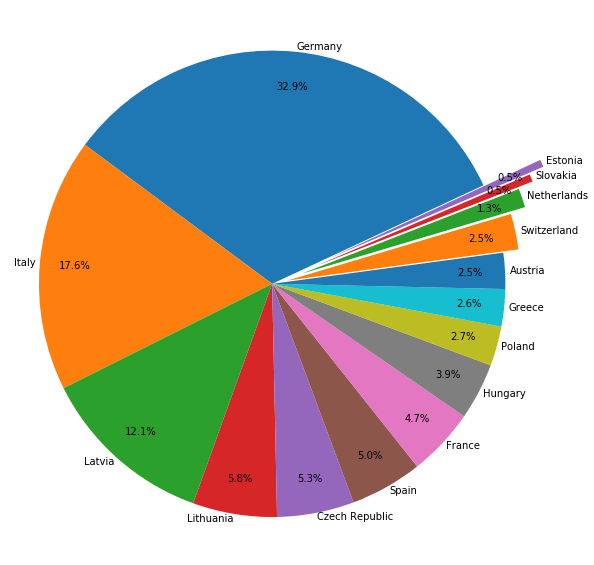

In [19]:
grouped_df = df_kz.groupby('sch_state').sum().decisions.nlargest(len(df_kz))
plt.figure(figsize=(10,10))
plt.subplot(111)
explode_thr = 10
plt.pie(grouped_df,
        labels=grouped_df.index,
        autopct='%.1f%%', shadow=False, pctdistance=0.85, labeldistance=1.02, startangle=25,
        explode = [0 if i < explode_thr else (i/len(grouped_df))-(explode_thr/len(grouped_df)) for i in range(len(grouped_df))])
plt.axis('equal')
plt.show()

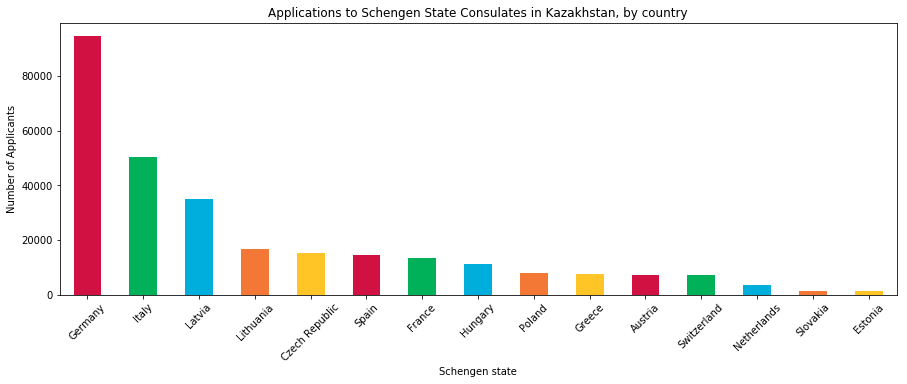

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(111)
from itertools import cycle, islice
my_colors = list(islice(cycle(['#d11141', '#00b159', '#00aedb', '#f37735', '#ffc425']), None, len(df)))
chart = grouped_df.plot(kind='bar', color = my_colors)
chart.set_xlabel('Schengen state')
chart.set_ylabel('Number of Applicants')
chart.set_xticklabels(labels = chart.get_xticklabels(), rotation = 45)
chart.set_title('Applications to Schengen State Consulates in Kazakhstan, by country')
plt.show()

In this case it is obvious to see that Germany is the most popular country choice for visa application in Kazakhstan. Other popular choices include Italy, Czech Republic, and Spain.

But we are not sure if Germany is the most generous consulate when it comes to obtaining the schengen visa. We'll explore this more in detail.

#Exploring generous consulates

In [21]:
df_kz_sorted = df_kz[['sch_state','consulate_city', 'decisions', 'mevs_share', 'rejection_rate']].sort_values(by=['rejection_rate'], ascending=True).reset_index(drop=True)
df_kz_sorted.index = np.arange(1, len(df_kz_sorted) + 1)
df_kz_sorted

,sch_state,consulate_city,decisions,mevs_share,rejection_rate
1,Latvia,ASTANA,34859,0.826903,0.004389
2,Spain,ASTANA,14404,0.058248,0.005762
3,Switzerland,ASTANA,7121,0.451060,0.005898
4,Lithuania,ASTANA,1767,0.534239,0.007357
5,Estonia,ASTANA,1473,0.522743,0.012220
6,Slovakia,ASTANA,1484,0.342992,0.015499
7,Germany,ASTANA,68403,0.735699,0.029911
8,France,ASTANA,2769,0.254966,0.038642
9,Czech Republic,ASTANA,15359,0.091477,0.040042
10,France,ALMATY,10762,0.184167,0.044601


While Germany gets most of the applications, we see that it also has the highest rejection rate.
Latvia, Spain, and Switzerland have the highest  rates. But we are not sure if that is related to how strong their visa applicants are 

i.e. Switzerland is known for strict Visa requirements, but at this case it accepts most of the people. It may be related to the fact that most of the people usually don't apply to Switzerland, and if they do, they already have strong documents.

Let's see how often countries give Multiple Entry Visas (MVEs).

In [22]:
df_kz_mve = df_kz[['sch_state', 'consulate_city', 'decisions', 'mevs_share', 'rejection_rate']]\
.sort_values(by=['mevs_share'], ascending=False).reset_index(drop=True)
df_kz_mve.index = np.arange(1, len(df_kz_mve) + 1)
df_kz_mve

,sch_state,consulate_city,decisions,mevs_share,rejection_rate
1,Greece,ASTANA,7428,0.875067,0.094507
2,Netherlands,ASTANA,3755,0.828229,0.078296
3,Latvia,ASTANA,34859,0.826903,0.004389
4,Germany,ASTANA,68403,0.735699,0.029911
5,Lithuania,ASTANA,1767,0.534239,0.007357
6,Estonia,ASTANA,1473,0.522743,0.012220
7,Switzerland,ASTANA,7121,0.451060,0.005898
8,Lithuania,ALMATY,15021,0.387857,0.051728
9,Slovakia,ASTANA,1484,0.342992,0.015499
10,Germany,ALMATY,26192,0.337622,0.306926


Let's see what happens if we normalize the scores. 

We will use MinMax scale to normalize the data and give equal weights to both acceptance rates and shares of MVEs.

In that case, we will get to know which countries are best to apply for getting **multiple visa entries** while we are still **not sure** about the document strengths.

In [23]:
df_kz['score'] = (1 - df_kz['rejection_rate'].astype(float)) * df_kz.mevs_share.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df_kz['score'] = min_max_scaler.fit_transform(df_kz[['score']].values)

df_kz_balanced = df_kz[['sch_state', 'consulate_city', 'decisions', 'score']]\
.sort_values(by=['score'], ascending=False).reset_index(drop=True)
df_kz_balanced.index = np.arange(1, len(df_kz_balanced) + 1)
df_kz_balanced

,sch_state,consulate_city,decisions,score
1,Latvia,ASTANA,34859,1.000000
2,Greece,ASTANA,7428,0.959619
3,Netherlands,ASTANA,3755,0.921748
4,Germany,ASTANA,68403,0.856826
5,Lithuania,ASTANA,1767,0.617220
6,Estonia,ASTANA,1473,0.598989
7,Switzerland,ASTANA,7121,0.510201
8,Lithuania,ALMATY,15021,0.404883
9,Slovakia,ASTANA,1484,0.365532
10,France,ASTANA,2769,0.244592


# Testing hypothesis

Now we need to make sure if such results are random or not.

Our question is whether all applications are on the same level, in other words - there is no significant difference between consulates because all applications are of the same quality.

We may say it's true, because people from Kazakhstan generally attempt to move abroad, and Schengen area countries are known to have a high standard of living.

We will conduct tests to see if it's actually true or not.

In [24]:
population_decisions = df_kz.decisions.sum()
population_rejects = df_kz.rejected.sum()
population_rejection_mean = population_rejects/population_decisions
print('Average rejection rate in Kazakhstan for Schengen Visas in 2018: {:.2f}%'.format(population_rejection_mean*100))

Average rejection rate in Kazakhstan for Schengen Visas in 2018: 8.87%


In [0]:
top_generous = df_kz[['sch_state', 'consulate_city', 'decisions', 'rejected', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=True)
top_generous = top_generous[top_generous.rejection_rate < population_rejection_mean]

In [26]:
def hypothesis_testing(df, state):
    null_hypothesis_accepted = list()
    null_hypothesis_rejected = list()
    for idx, consulate in df.iterrows():
        N = int(consulate.decisions)
        K = int(consulate.rejected) # K rejects, N-K accepts
        arr = np.array([1] * K + [0] * (N-K))
        np.random.shuffle(arr)
        tstat, pval = ttest_1samp(arr, population_rejection_mean)
        if pval < 0.001:
            null_hypothesis_rejected.append(str(consulate.sch_state) + ' in ' + str(consulate.consulate_city))
        else:
            null_hypothesis_accepted.append(str(consulate.sch_state) + ' in ' + str(consulate.consulate_city))
    print('Null Hypothesis REJECTED, {} acceptance rates than average that COULDN\'T happen by chance: \n{}'.format(state, '\n'.join(null_hypothesis_rejected)))
    print('--------------------------------------------------------------------------------------------\n')
    print('Null Hypothesis ACCEPTED, {} acceptance rates than average that COULD have happened by chance: \n{}'.format(state, '\n'.join(null_hypothesis_accepted)))
hypothesis_testing(top_generous, 'better')

Null Hypothesis REJECTED, better acceptance rates than average that COULDN'T happen by chance: 
Latvia in ASTANA
Spain in ASTANA
Switzerland in ASTANA
Lithuania in ASTANA
Estonia in ASTANA
Slovakia in ASTANA
Germany in ASTANA
France in ASTANA
Czech Republic in ASTANA
France in ALMATY
Hungary in ALMATY
Lithuania in ALMATY
Austria in ASTANA
--------------------------------------------------------------------------------------------

Null Hypothesis ACCEPTED, better acceptance rates than average that COULD have happened by chance: 
Netherlands in ASTANA


In [27]:
most_strict = df_kz[['sch_state', 'consulate_city', 'decisions', 'rejected', 'rejection_rate']]\
.sort_values(by=['rejection_rate'], ascending=False)
most_strict = most_strict[most_strict.rejection_rate > population_rejection_mean]
hypothesis_testing(most_strict, 'lower')

Null Hypothesis REJECTED, lower acceptance rates than average that COULDN'T happen by chance: 
Germany in ALMATY
Italy in ASTANA
Poland in ALMATY
Poland in ASTANA
--------------------------------------------------------------------------------------------

Null Hypothesis ACCEPTED, lower acceptance rates than average that COULD have happened by chance: 
Greece in ASTANA


From the hypothesis testings conducted, we can see that acceptances and rejections are not happening by chance. Consulates of Greece and Netherlands, however, are not confirming this statement particularly due to lower applications numbers.

**Conclusion:**
**To maximize attempts at obtaining Schengen visa, it is advised to apply to Baltic countries, as well as Netherlands. Chances of getting Multiple Visit Entry Visa are higher in Greece, and much lower in Spain, despite the low rejection rates in general.**

**If you are unsure of your document strengths and want to obtain MVE Visa, aim for Baltic countries.**

#Appendix: Countries Ranking

In [39]:
world_rejects = df[~df.consulate_country.isin([sch_state.upper() for sch_state in df.sch_state.values])]\
                .groupby('consulate_country').sum()\
                .groupby(level=0).filter(lambda x: x.decisions > 100)
world_rejects['rejection_rate'] = world_rejects.rejected/world_rejects.decisions
highest_rejections = world_rejects.sort_values(by=['rejection_rate'], ascending=False).drop(['mevs_issued', 'mevs_share'], axis=1)
highest_rejections.drop('HOLY SEE', axis=0, inplace=True)
print('{} is the {}th hardest country to get a schengen visa from {} total countries'.format(country, highest_rejections.index.get_loc(country), len(highest_rejections)))

world_mevs = df[(df.mevs_share <= 1) & (~df.consulate_country.isin([sch_state.upper() for sch_state in df.sch_state.values]))]\
                .groupby('consulate_country').sum()\
                .groupby(level=0).filter(lambda x: x.decisions > 100)
world_mevs['mevs_share'] = world_mevs.mevs_issued/world_mevs.uniform_visas_issued
lowest_mevs = world_mevs.sort_values(by=['mevs_share'], ascending=True)
lowest_mevs.drop('HOLY SEE', axis=0, inplace=True)
print('{} is the {}th hardest country to get a MEV schengen visa from {} total countries'.format(country, lowest_mevs.index.get_loc(country), len(lowest_mevs)))

KAZAKHSTAN is the 93th hardest country to get a schengen visa from 143 total countries
KAZAKHSTAN is the 77th hardest country to get a MEV schengen visa from 143 total countries


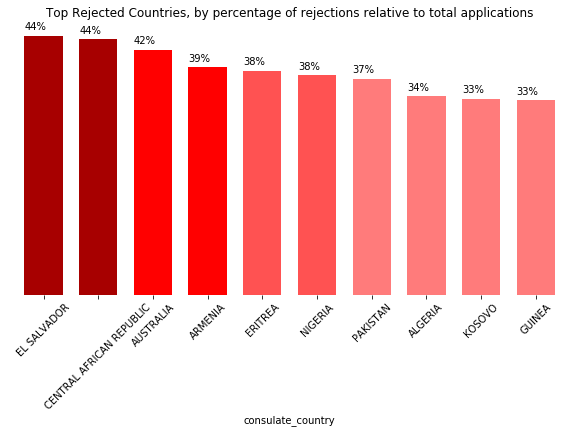

In [75]:
result = highest_rejections['rejection_rate'].iloc[:10]
colors_list = ['#a70000','#a70000','#ff0000','#ff0000','#ff5252','#ff5252','#ff7b7b','#ff7b7b','#ff7b7b','#ff7b7b']
ax = (result.plot(kind='bar',figsize=(10,5),width = 0.7,color = colors_list,edgecolor=None))
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
plt.title('Top Rejected Countries, by percentage of rejections relative to total applications')
plt.xticks()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))